In [1]:
import matplotlib.pyplot as plt
from pot_correction import *
from uncertain_dp2 import *

In [2]:
import pandas as pd
import numpy as np
import random

In [3]:
DNA_LENGTH = 50           
READ_lENGTH = 35
READ_COUNT = 10

PROBABILISTIC_ALIGNMENT_BONUS = 2
NORMAL_ALIGNMENT_BONUS = 0.7

ALIGNMENT_BONUS = PROBABILISTIC_ALIGNMENT_BONUS

In [4]:
dna = generate_dna(DNA_LENGTH)
reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]
#check_dna_distance_error_rate_suitable(dna, reads, alignment_bonus=ALIGNMENT_BONUS)

In [5]:



def compare_and_plot(read_correctors: list[t.Callable[[list[Read]],list[Read]]],*, names: list[str]=None,  iterations=4):
    if names is None:
        names = [str(i) for i in range(len(read_correctors))]

    all: list[list[float]] = [[] for _ in read_correctors]
    for _ in range(iterations):

        dna = generate_dna(DNA_LENGTH)
        reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]

        for j, corrector in enumerate(read_correctors):
            corrected_reads = corrector(reads)
            all[j].append(dna_distance_error_rate(dna, corrected_reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS))


    plt.bar(
        names,
        [np.mean(measurement_row) for measurement_row in all],
        yerr=[pd.Series(measurement_row).sem() for measurement_row in all],
        capsize=6
    )

In [41]:
gauss_error_rates = [0,0.1,0.2,0.3,0.4,0.45,0.46,0.47,0.48,0.49,0.5, 0.6,0.7,0.8,0.9,1,1.5,2]#,20,30,50,100]

results = [[] for _ in gauss_error_rates]
plain_results = []
error_rates = []

for i in range(4):
    dna = generate_dna(DNA_LENGTH)
    reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]
    for j,error_rate in enumerate(gauss_error_rates):
        
        for r in reads:
            r.uncertain_text = [gauss_unsharp_uncertainty_generator(base, error_rate) for base in r.original_text]
        
        error_rates.append(dna_distance_error_rate(dna, reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS))
        corrected_reads = correct_reads_with_consens(reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS, probabilistic=True)
        error_rate_after_correction = dna_distance_error_rate(dna, corrected_reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS)
        results[j].append(error_rate_after_correction)
        plain_results.append(error_rate_after_correction)

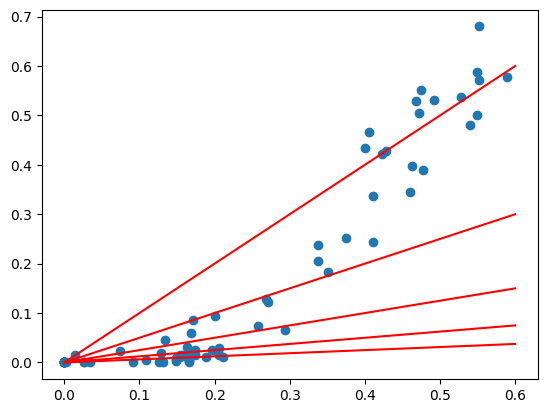

In [46]:
plt.scatter(error_rates, plain_results, label="mean")
until = 0.6
plt.plot([0,until],[0,until], color="red", label="y=x")
plt.plot([0,until],[0,until/2], color="red", label="y=x")
plt.plot([0,until],[0,until/4], color="red", label="y=x")
plt.plot([0,until],[0,until/8], color="red", label="y=x")
plt.plot([0,until],[0,until/16], color="red", label="y=x")

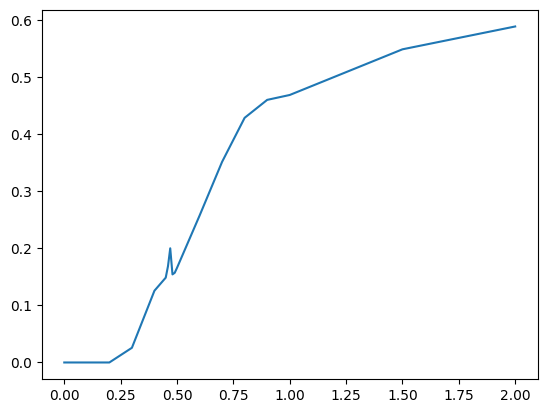

In [47]:
plt.plot(gauss_error_rates, error_rates[:len(gauss_error_rates)], label="error rate before correction")